<center><h1>Final Project 3</h1></center>
<center><h4>Athina Ibanez Oktaviolla || PYTN-KS01-009</h4></center>
<hr>

### A. Project Overview

#### Latar Belakang
Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu.
<br>sumber: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

#### Tujuan
Tujuan dari notebook ini adalah:
1. Mampu memahami konsep Classification dengan Ensemble Model
2. Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
3. Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

#### Data yang digunakan:
1. Sumber: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2. Jumlah data: 299 baris, 13 kolom
3. Feature: 13 feature

#### Yang ingin dicapai:
Memilih ensamble model yang sesuai dengan akurasi yang tinggi.


### B. Import Library yang dibutuhkan

In [47]:
#Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

### C. Data Loading

In [48]:
#load data
df = pd.read_csv("dataset/heart_failure_clinical_records_dataset.csv")

In [49]:
#melihat 5 baris teratas dari dataset
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [50]:
#melihat 5 baris terakhir dataset
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [51]:
#melihat ukuran dataset
df.shape

(299, 13)

In [52]:
#melihat informasi dari setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Terdapat dua tipe data yaitu float dan integer

In [53]:
#melihat missing value dari masing-masing kolom
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

NOTE: Tidak ada missing value pada dataset

In [54]:
#melihat nilai-nilai yang bersifat statistik dari setiap kolom
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [55]:
#melihat variance dari setiap kolom
df.var()

age                         1.414865e+02
anaemia                     2.461224e-01
creatinine_phosphokinase    9.414586e+05
diabetes                    2.441023e-01
ejection_fraction           1.400635e+02
high_blood_pressure         2.286144e-01
platelets                   9.565669e+09
serum_creatinine            1.070211e+00
serum_sodium                1.946996e+01
sex                         2.286144e-01
smoking                     2.187156e-01
time                        6.023965e+03
DEATH_EVENT                 2.187156e-01
dtype: float64

Berdasarkan deskripsi dan variance terdapat perbedaan yang cukup jauh pada kolom creatinine_phosphokinase dan platelets yang dapat menghambat akurasi.

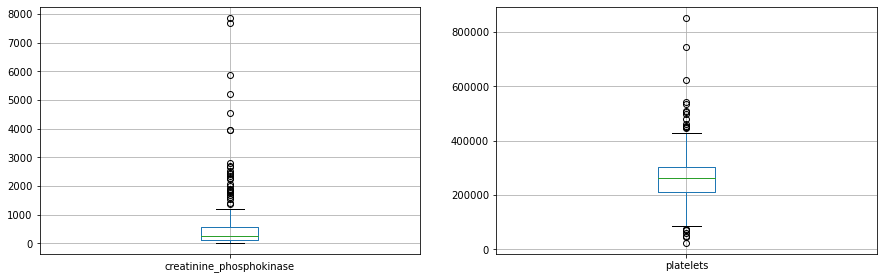

In [56]:
#checking outliers
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='creatinine_phosphokinase')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='platelets')


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


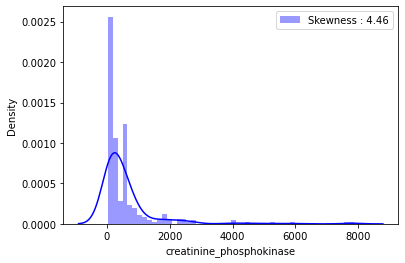

In [63]:
#melihat skewness dari kolom "creatine_phospokinasi"
cr_skewness = sns.distplot(df["creatinine_phosphokinase"], 
    color="b", 
    label="Skewness : %.2f"%(df["creatinine_phosphokinase"].skew()))
cr_skewness = cr_skewness.legend(loc="best")

NOTE: Skewness pada kolom creatinine_phosphokinase cukup besar.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


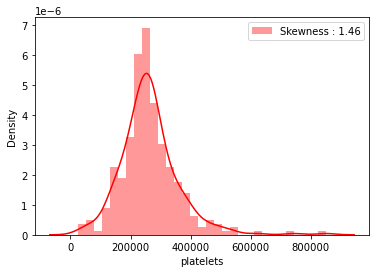

In [62]:
#melihat skewness dari kolom 
pl_skewness = sns.distplot(df["platelets"], 
    color="r", 
    label="Skewness : %.2f"%(df["platelets"].skew()))
pl_skewness = pl_skewness.legend(loc="best")

In [31]:
#mengambil nama kolom
kolom = [col for col in df.columns]
kolom

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

### D. Data Cleaning

Data tidak memiliki missing values, nama kolom tidak perlu diganti. Untuk data cleaning hanya menghapus ouliers

In [65]:
#menghitung batas atas dan batas bawah
for feature in kolom:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit, feature] = lower_limit
    df.loc[df[feature]>upper_limit, feature] = upper_limit 

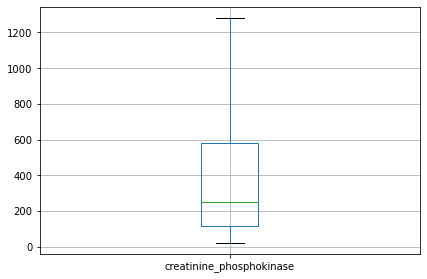

In [66]:
#mengecek kembali outliers
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='creatinine_phosphokinase')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


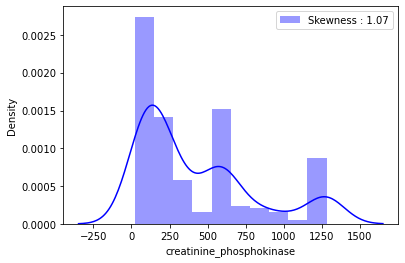

In [67]:
#melihat skewness dari kolom "creatine_phospokinasi"
cr_skewness = sns.distplot(df["creatinine_phosphokinase"], 
    color="b", 
    label="Skewness : %.2f"%(df["creatinine_phosphokinase"].skew()))
cr_skewness = cr_skewness.legend(loc="best")

NOTE: Saya memutuskan untuk menurunkan skewness pada kolom creatinine_phosphokinase dengan cara menghapus outliers yang ada dan tidak menormalisasi kolom ini. Hal ini dikarenakan akan terjadi penurunan akurasi jika kolom creatinine_phosphokinase di normalisasi

### E. Data Preprocessing



In [68]:
#Memisahkan dataset ke train dan test data
features = df.drop(["DEATH_EVENT"], axis=1)
labels = df["DEATH_EVENT"]
x_train, x_test, y_train, y_test = train_test_split(features, labels, 
                                test_size=0.30, random_state=7)

In [69]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Memprediksi data test 
    y_pred = model.predict(x_test)

    # Menghitung accuracy, precision, recall, f1-score, dan kappa score
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    kappa_score = metrics.cohen_kappa_score(y_test, y_pred)

    # Menghitung daerah dibawah curve
    y_pred_proba = model.predict_proba(x_test)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    
    auc_score = metrics.roc_auc_score(y_test, y_pred_proba)

    # confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score, 'kappa_score': kappa_score, 
           'fpr': fpr, 'tpr': tpr, 'auc_score': auc_score, 'cm': cm}

In [70]:
#logistic regression
model_logreg = LogisticRegression()

#Random Forest model 
model_rf = RandomForestClassifier(random_state=0)

#KNN model 
model_knn = KNeighborsClassifier()

#SVM model 
from sklearn import svm
model_svm=svm.SVC(probability=True)

#Adaboost Classifier
model_adaboost = AdaBoostClassifier()

In [71]:
vot_clf = VotingClassifier(estimators = [('lr', model_logreg), 
            ('rnd', model_rf), ('knn', model_knn), 
            ('svm', model_svm)], voting = 'hard')

In [72]:
vot_clf.fit(x_train,y_train);

In [73]:
for clf in (model_logreg, model_rf, model_knn, model_svm, model_adaboost, vot_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.8444444444444444
RandomForestClassifier 0.9
KNeighborsClassifier 0.6222222222222222
SVC 0.7222222222222222
AdaBoostClassifier 0.8555555555555555
VotingClassifier 0.7444444444444445


In [74]:
#membuat prediksi untuk random forest classifier
rf = model_rf.predict(x_test)
print(rf)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.]


### Dapat ditarik kesimpulan:
1. Algoritma yang dipilih adalah Random Forest karena akurasi mencapai 90%
2. Tidak melakukan normalisasi pada kolom creatinine_phosphokinase karena menurunkan akurasi pada model.
3. Menghapus outliers sangat dibutuhkan untuk meningkatkan akurasi.